In [1]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = '../dataset/gaze_points.csv'

dataset = pd.read_csv(df)
display(dataset)

,Unnamed: 0,timestamp,x,y
0,0,1.687294e+09,1768.909091,100.767857
1,1,1.687294e+09,1638.340909,189.421875
2,2,1.687294e+09,1524.093750,265.547712
3,3,1.687294e+09,1424.672940,333.122105
4,4,1.687294e+09,1336.588823,390.803271
...,...,...,...,...
1103,1103,1.687294e+09,247.114917,550.262809
1104,1104,1.687294e+09,252.771007,554.765672
1105,1105,1.687294e+09,258.265540,558.223535
1106,1106,1.687294e+09,265.255075,561.249164


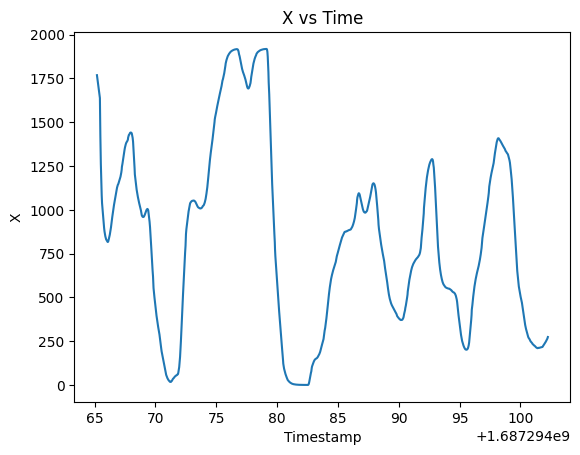

In [3]:
plt.plot(dataset.timestamp, dataset.x)
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('X vs Time')
plt.show()

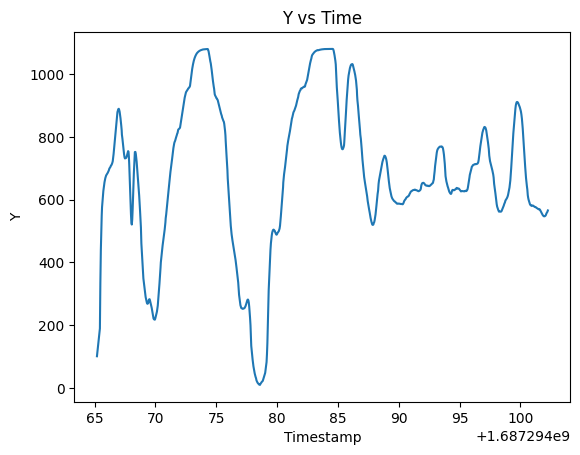

In [4]:
plt.plot(dataset.timestamp, dataset.y)
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('Y vs Time')
plt.show()

In [28]:
from sklearn.cluster import KMeans
x = dataset.x
x = [x.to_numpy()]
y = dataset.y
y = [y.to_numpy()]


kmeans = KMeans(n_clusters = 1, random_state = 0)
kmeans.fit(x)

/home/nata-brain/miniconda3/envs/eyegaze/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1, random_state=0)

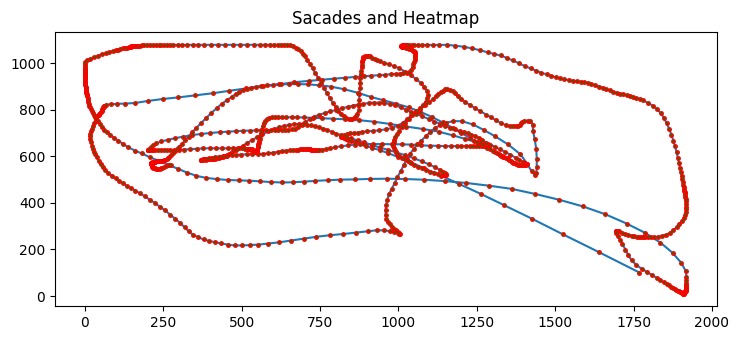

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x              = dataset.x
y              = dataset.y
datetime       = dataset.timestamp
grid_size      = 1
h              = 10
x_min          = min(x)
x_max          = max(x)
y_min          = min(y)
y_max          = max(y)

x_grid         = np.arange(x_min-h, x_max+h, grid_size)
y_grid         = np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh  = np.meshgrid(x_grid,y_grid)


xc             = x_mesh+(grid_size/2)
yc             = y_mesh+(grid_size/2)

print('x: ', x)
print('------------')
print('y: ', y) marker=".",
print('------------')
print('datetime: ', datetime)
print('------------')
print('grid_size: ', grid_size)
print('------------')
print('h: ', h)
print('------------')
print('x_min: ', x_min)
print('------------')
print('x_max: ', x_max)
print('------------')
print('y_min: ', y_min)
print('------------')
print('y_max: ', y_max)
print('------------')
print('x_grid: ', x_grid)
print('------------')
print('y_grid: ', y_grid)
print('------------')
print('x_mesh: ', x_mesh)
print('------------')
print('y_mesh: ', y_mesh)
print('------------')
print('xc: ', xc)
print('------------')
print('yc: ', yc) """


""" def kde_quartic(d,h):
   dn=d/h
   P=(15/16)*(1-dn**2)**2
   
   return P
 
intensity_list=[]

for j in range(len(xc)):
    
    intensity_row=[]
    
    for k in range(len(xc[0])):
        kde_value_list=[]
        
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
            #print('D -> ', d)
            
        #print('kde_value_list -> ', kde_value_list)
            
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)        


plt.title("Sacades and Heatmap")
#plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x, y, marker=".", markersize=5, markeredgecolor="red", markerfacecolor="green")
#plt.colorbar()
plt.show() 
 

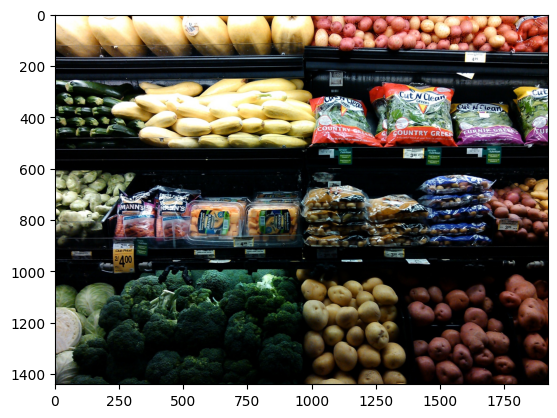

In [12]:
img = cv2.imread('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery-412912_1920.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

                x           y
0     1768.909091  100.767857
1     1638.340909  189.421875
2     1524.093750  265.547712
3     1424.672940  333.122105
4     1336.588823  390.803271
...           ...         ...
1103   247.114917  550.262809
1104   252.771007  554.765672
1105   258.265540  558.223535
1106   265.255075  561.249164
1107   273.552736  565.343019

[1108 rows x 2 columns]


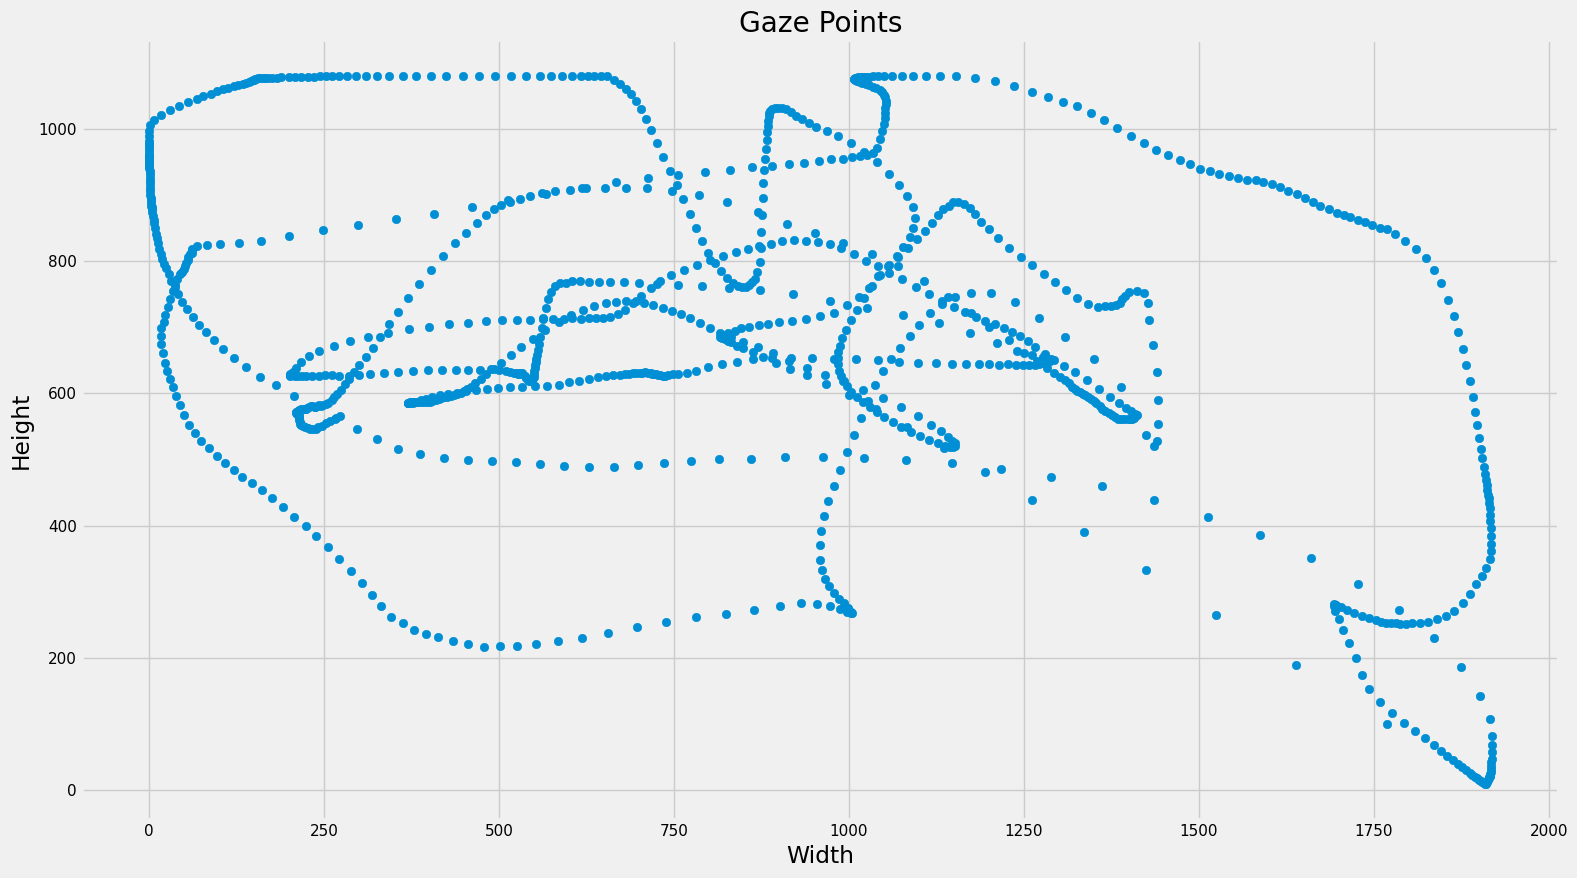

In [47]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

df = pd.read_csv('../dataset/gaze_points.csv')
df = df.drop(['Unnamed: 0', 'timestamp'], axis=1)
print(df)


# Plot the data
plt.figure(figsize=(16, 9))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Gaze Points'); 






4
[1 1 1 ... 2 2 2]


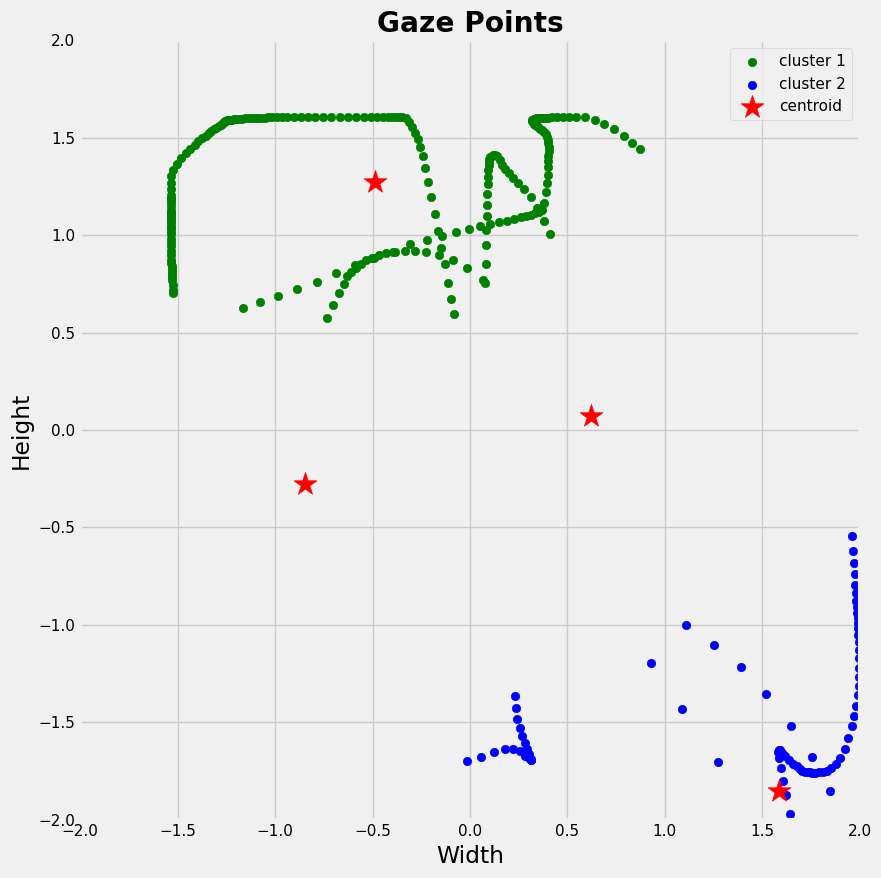

In [60]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = KMeans(n_clusters=4, max_iter=100)
km.fit(X_std)

centroids = km.cluster_centers_
print(len(centroids))
print(km.labels_)

# Plot the clustered data
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Gaze Points', fontweight='bold')
ax.set_aspect('equal')  